In [1]:
#exercise 1
import csv

def load_data(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    header = data[0]
    instances = data[1:]
    return header, instances

def find_s_algorithm(data):
    hypothesis = ['0'] * (len(data[0]) - 1)
    for instance in data:
        if instance[-1].lower() == 'yes':
            for i in range(len(hypothesis)):
                if hypothesis[i] == '0':
                    hypothesis[i] = instance[i]
                elif hypothesis[i] != instance[i]:
                    hypothesis[i] = '?'
    return hypothesis

if __name__ == "__main__":
    header, data = load_data("data.csv")
    final_hypothesis = find_s_algorithm(data)
    print("Final Hypothesis (Find-S):", final_hypothesis)


Final Hypothesis (Find-S): ['sunny', 'warm', '?', 'strong', '?', '?']


In [7]:
#exercise 2
import csv

def load_data(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    header = data[0]
    instances = data[1:]
    return header, instances

def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == '?' or (x != '0' and (x == y or y == '0'))
        more_general_parts.append(mg)
    return all(more_general_parts)

def candidate_elimination(data):
    n_attributes = len(data[0]) - 1
    G = [['?'] * n_attributes]
    S = ['0'] * n_attributes

    for instance in data:
        inputs, output = instance[:-1], instance[-1].lower()
        if output == 'yes':
            for i in range(n_attributes):
                if S[i] == '0':
                    S[i] = inputs[i]
                elif S[i] != inputs[i]:
                    S[i] = '?'
            G = [g for g in G if more_general(g, S)]
        else:
            G_new = []
            for g in G:
                for i in range(n_attributes):
                    if g[i] == '?':
                        for val in set(d[i] for d in data if d[-1].lower() == 'yes'):
                            if val != inputs[i]:
                                new_hypothesis = g.copy()
                                new_hypothesis[i] = val
                                G_new.append(new_hypothesis)
                    elif g[i] != inputs[i]:
                        G_new.append(g)
            G = G_new
    return S, G

if __name__ == "__main__":
    header, data = load_data("data.csv")
    S_final, G_final = candidate_elimination(data)
    print("Final Specific Hypothesis (S):", S_final)
    print("Final General Hypotheses (G):")
    for g in G_final:
        print(g)


Final Specific Hypothesis (S): ['sunny', 'warm', '?', 'strong', '?', '?']
Final General Hypotheses (G):
['sunny', '?', '?', '?', '?', '?']
['?', 'warm', '?', '?', '?', '?']


In [13]:
#exercise 5
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate dummy regression data
X, y = make_regression(n_samples=200, n_features=5, noise=15)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor()
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    print(f"\n{name}")
    print(f"Mean MSE (Bias): {np.mean(mse_scores):.2f}")
    print(f"Variance: {np.var(mse_scores):.2f}")



Linear Regression
Mean MSE (Bias): 225.49
Variance: 2033.04

Decision Tree
Mean MSE (Bias): 7064.57
Variance: 496709.62


In [15]:
#exercise6
import pandas as pd

# 🎯 Sample data
df = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue'],
    'Size': ['S', 'M', 'L', 'S', 'L']
})

print("🔹 Original Data:\n", df)

# 🏷️ Label Encoding (Categorical Encoding)
# Converts each category into a number
df['Color_Label'] = df['Color'].astype('category').cat.codes
df['Size_Label'] = df['Size'].astype('category').cat.codes

print("\n🔸 Label Encoded Data (Categorical Encoding):\n", df[['Color', 'Color_Label', 'Size', 'Size_Label']])

# 🔢 One-Hot Encoding
# Converts each category into separate binary columns
df_onehot = pd.get_dummies(df[['Color', 'Size']], drop_first=False)

print("\n🔸 One-Hot Encoded Data:\n", df_onehot)


🔹 Original Data:
    Color Size
0    Red    S
1   Blue    M
2  Green    L
3    Red    S
4   Blue    L

🔸 Label Encoded Data (Categorical Encoding):
    Color  Color_Label Size  Size_Label
0    Red            2    S           2
1   Blue            0    M           1
2  Green            1    L           0
3    Red            2    S           2
4   Blue            0    L           0

🔸 One-Hot Encoded Data:
    Color_Blue  Color_Green  Color_Red  Size_L  Size_M  Size_S
0       False        False       True   False   False    True
1        True        False      False   False    True   False
2       False         True      False    True   False   False
3       False        False       True   False   False    True
4        True        False      False    True   False   False


📋 First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

📊 Class Distribution:
 species
0    50
1    50
2    50
Name: count, dtype: int64

📈 Feature Summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25

/home/praneeth/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


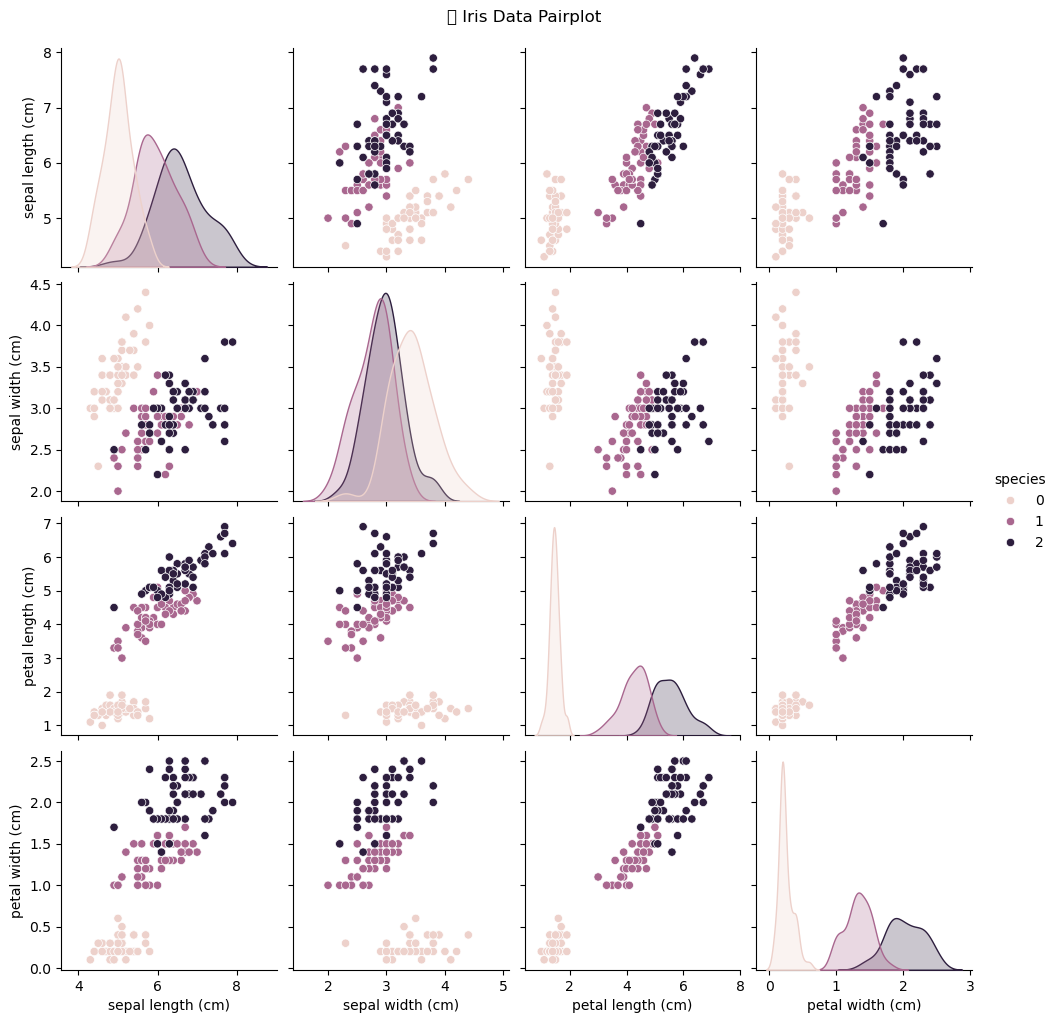

/home/praneeth/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


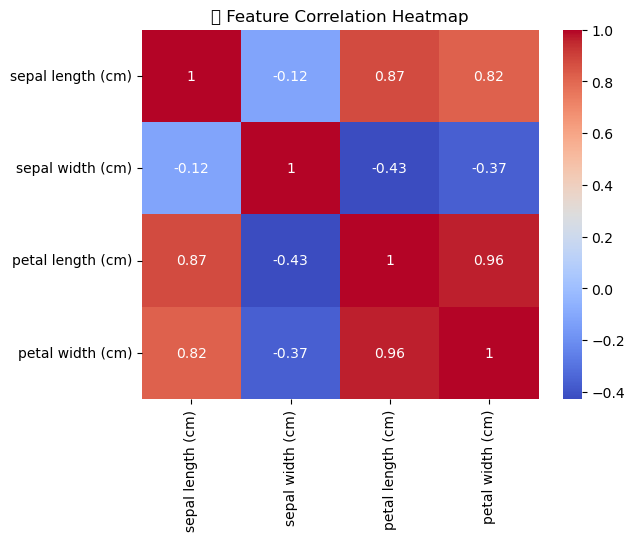

In [57]:
# exercise 12
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Convert target numbers to species names
df['species'] = df['species']
# 1. Show first 5 rows
print("📋 First 5 rows:\n", df.head())

# 2. Basic info
print("\n📊 Class Distribution:\n", df['species'].value_counts())

# 3. Summary statistics
print("\n📈 Feature Summary:\n", df.describe())

# 4. Plot: Feature distribution by class
sns.pairplot(df, hue="species")
plt.suptitle("🌸 Iris Data Pairplot", y=1.02)
plt.show()

# 5. Correlation heatmap
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("📊 Feature Correlation Heatmap")
plt.show()


Accuracy: 0.9777777777777777


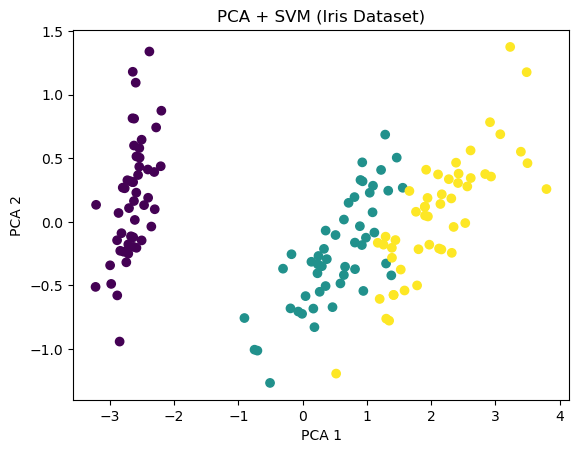

In [21]:
#exercise 14
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Reduce dimensions from 4 to 2 using PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=1)

# Train SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict and check accuracy
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot PCA-reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA + SVM (Iris Dataset)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


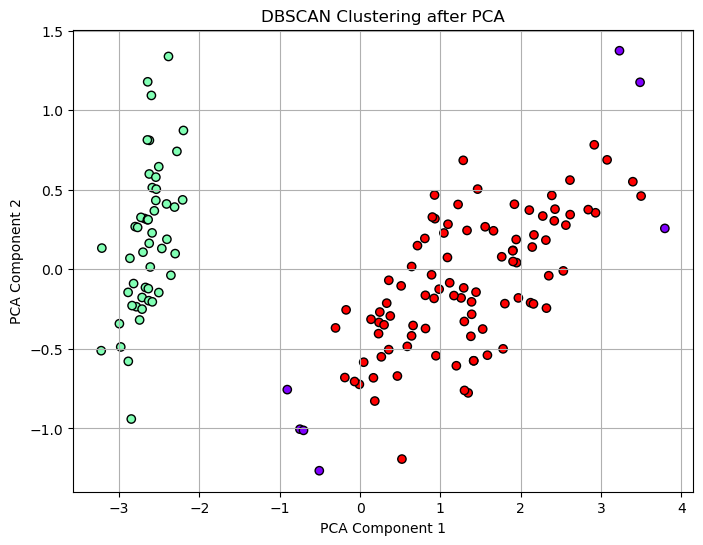

Cluster labels found by DBSCAN: [-1  0  1]


In [23]:
#exercise 15
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', edgecolors='k')
plt.title("DBSCAN Clustering after PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Show unique cluster labels
print("Cluster labels found by DBSCAN:", np.unique(labels))


In [55]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train k-NN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Print accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Print correct and wrong predictions
print("\n🔍 Predictions:")
for i in range(len(X_test)): 
    actual = target_names[y_test[i]]
    predicted = target_names[y_pred[i]]
    if y_pred[i] == y_test[i]:
        print(f"✅ Correct:  Predicted = {predicted} | Actual = {actual}")
    else:
        print(f"❌ Wrong:    Predicted = {predicted} | Actual = {actual}")


✅ Accuracy: 1.0

🔍 Predictions:
✅ Correct:  Predicted = versicolor | Actual = versicolor
✅ Correct:  Predicted = setosa | Actual = setosa
✅ Correct:  Predicted = virginica | Actual = virginica
✅ Correct:  Predicted = versicolor | Actual = versicolor
✅ Correct:  Predicted = versicolor | Actual = versicolor
✅ Correct:  Predicted = setosa | Actual = setosa
✅ Correct:  Predicted = versicolor | Actual = versicolor
✅ Correct:  Predicted = virginica | Actual = virginica
✅ Correct:  Predicted = versicolor | Actual = versicolor
✅ Correct:  Predicted = versicolor | Actual = versicolor
✅ Correct:  Predicted = virginica | Actual = virginica
✅ Correct:  Predicted = setosa | Actual = setosa
✅ Correct:  Predicted = setosa | Actual = setosa
✅ Correct:  Predicted = setosa | Actual = setosa
✅ Correct:  Predicted = setosa | Actual = setosa
✅ Correct:  Predicted = versicolor | Actual = versicolor
✅ Correct:  Predicted = virginica | Actual = virginica
✅ Correct:  Predicted = versicolor | Actual = versicolo

In [17]:
#exercise 4
#a
from sklearn.linear_model import LinearRegression
import numpy as np

# Data: [Hours Studied], [Score]
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([40, 50, 60, 70, 80])

# Model
model = LinearRegression()
model.fit(X, y)

# Predict score for 6 hours of study
prediction = model.predict([[6]])
print(f"Predicted Score for 6 hours of study: {prediction[0]:.2f}")
#b
from sklearn.linear_model import LogisticRegression
import numpy as np

# Data: [Hours Studied], Pass (1) or Fail (0)
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([0, 0, 0, 1, 1, 1])

# Model
model = LogisticRegression()
model.fit(X, y)

# Predict pass/fail for 3.5 hours
prediction = model.predict([[4]])
print(f"Predicted outcome for 3.5 hours of study: {'Pass' if prediction[0] else 'Fail'}")
#c
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample emails
emails = [
    "Win a free iPhone now",        # spam
    "Lowest price on medications",  # spam
    "Meeting schedule for tomorrow",# not spam
    "Project deadline extended",    # not spam
]

labels = [1, 1, 0, 0]  # 1: spam, 0: not spam

# Convert text to numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Train classifier
clf = MultinomialNB()
clf.fit(X, labels)

# Predict a new email
new_email = ["Claim your free prize now"]
X_new = vectorizer.transform(new_email)
prediction = clf.predict(X_new)

print(f"The email is: {'Spam' if prediction[0] else 'Not Spam'}")


Predicted Score for 6 hours of study: 90.00
Predicted outcome for 3.5 hours of study: Pass
The email is: Spam


In [35]:
#exercise 7
import numpy as np

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR inputs and outputs
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
expected = np.array([[0], [1], [1], [0]])

# Random weights
np.random.seed(0)
weights1 = np.random.rand(2, 2)
weights2 = np.random.rand(2, 1)

# Training loop
for i in range(10000):
    # Forward pass
    layer1 = sigmoid(np.dot(inputs, weights1))
    output = sigmoid(np.dot(layer1, weights2))

    # Backpropagation
    error = expected - output
    d_output = error * sigmoid_derivative(output)

    error_hidden = d_output.dot(weights2.T)
    d_hidden = error_hidden * sigmoid_derivative(layer1)

    # Update weights
    weights2 += layer1.T.dot(d_output)
    weights1 += inputs.T.dot(d_hidden)

# Final prediction
print("Predicted Output:")
print(output.round())


Predicted Output:
[[0.]
 [1.]
 [1.]
 [0.]]


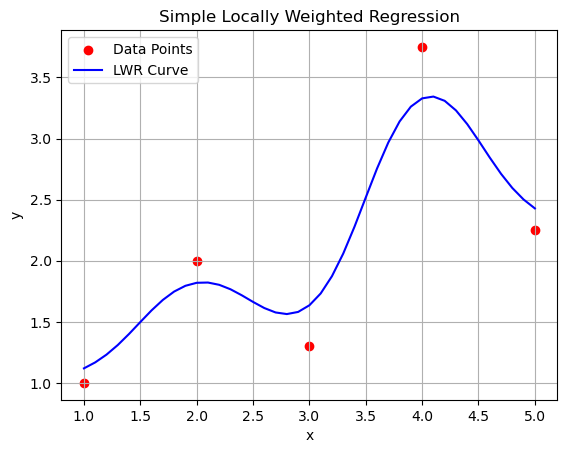

In [25]:
#exercise9
import math
import matplotlib.pyplot as plt

# Sample data: x and y
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 1.3, 3.75, 2.25]

# Gaussian weight function
def weight(x_query, x_i, tau):
    return math.exp(-(x_query - x_i)**2 / (2 * tau**2))

# Simple LWR: predict y for a given x_query
def predict(x_query, x_data, y_data, tau):
    weights = []
    for xi in x_data:
        w = weight(x_query, xi, tau)
        weights.append(w)

    # Weighted average
    numerator = 0
    denominator = 0
    for i in range(len(x_data)):
        numerator += weights[i] * y_data[i]
        denominator += weights[i]

    return numerator / denominator if denominator != 0 else 0

# Predict for many points to draw a curve
x_test = [i * 0.1 for i in range(10, 51)]  # 1.0 to 5.0
y_pred = [predict(x, x_data, y_data, tau=0.5) for x in x_test]

# Plot original data
plt.scatter(x_data, y_data, color='red', label='Data Points')
# Plot prediction curve
plt.plot(x_test, y_pred, color='blue', label='LWR Curve')
plt.title('Simple Locally Weighted Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
import pandas as pd
import math
from collections import Counter

# Step 1: Load the data directly (you can also save it as a CSV if needed)
data = {
    'Outlook':    ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature':['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity':   ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind':       ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Step 2: Entropy function
def entropy(col):
    counts = Counter(col)
    total = len(col)
    return -sum((count/total) * math.log2(count/total) for count in counts.values())

# Step 3: Information gain
def info_gain(df, feature, target):
    total_entropy = entropy(df[target])
    values = df[feature].unique()
    weighted_entropy = 0
    for val in values:
        subset = df[df[feature] == val]
        weighted_entropy += (len(subset)/len(df)) * entropy(subset[target])
    return total_entropy - weighted_entropy

# Step 4: ID3 function (simplified)
def id3(df, features, target):
    labels = list(df[target])
    
    if labels.count(labels[0]) == len(labels):
        return labels[0]  # pure class

    if not features:
        return Counter(labels).most_common(1)[0][0]  # majority class

    gains = [info_gain(df, f, target) for f in features]
    best_feat = features[gains.index(max(gains))]

    tree = {best_feat: {}}
    for val in df[best_feat].unique():
        sub_data = df[df[best_feat] == val]
        remaining_feats = [f for f in features if f != best_feat]
        tree[best_feat][val] = id3(sub_data, remaining_feats, target)
    
    return tree

# Step 5: Build tree
features = list(df.columns)
features.remove('PlayTennis')
tree = id3(df, features, 'PlayTennis')

print("✅ ID3 Decision Tree:")
print(tree)

# Step 6: Predict function
def predict(tree, sample):
    if type(tree) == str:
        return tree
    feature = list(tree.keys())[0]
    value = sample.get(feature)
    subtree = tree[feature].get(value)
    if subtree is None:
        return 'Unknown'
    return predict(subtree, sample)

# Step 7: Example Prediction
test_sample = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}
result = predict(tree, test_sample)
print("\n🔍 Prediction for test sample:", result)


✅ ID3 Decision Tree:
{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Overcast': 'Yes', 'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}

🔍 Prediction for test sample: No


In [39]:
#exercise 10
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


✅ Accuracy: 0.9777777777777777

🧮 Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

📋 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('Heart.csv')  # Make sure this matches your file

# Confirm column names
print("Columns:", list(data.columns))

# Binning continuous variables (optional for Naive Bayes)
data['Age'] = pd.cut(data['Age'], bins=[0, 40, 55, 100], labels=['young', 'middle', 'old'])
data['Chol'] = pd.cut(data['Chol'], bins=[0, 200, 240, 600], labels=['low', 'normal', 'high'])
data['RestBP'] = pd.cut(data['RestBP'], bins=[80, 120, 140, 200], labels=['low', 'normal', 'high'])
data['MaxHR'] = pd.cut(data['MaxHR'], bins=[60, 120, 150, 220], labels=['low', 'normal', 'high'])

# Choose features and target
categorical_cols = ['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'AHD']
data = data[categorical_cols]

# Encode all features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split features and target
X = data.drop('AHD', axis=1)
y = data['AHD']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Columns: ['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']

Accuracy: 0.7582417582417582

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78        48
           1       0.76      0.72      0.74        43

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load dataset
df = pd.read_csv("Heart.csv")  # Make sure file and column format matches

# Drop rows with missing values if any
df = df.dropna()

# Store true labels if available
if 'AHD' in df.columns:
    true_labels = df['AHD']
    df = df.drop(columns=['AHD'])
    label_encoder = LabelEncoder()
    true_labels_encoded = label_encoder.fit_transform(true_labels)
else:
    true_labels = None
    true_labels_encoded = None

# Identify categorical and numerical columns
categorical_cols = ['Sex', 'ChestPain', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Thal']
numerical_cols = [col for col in df.columns if col not in categorical_cols]

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Final feature matrix
X = df.values

# ---------------------------
# Apply K-Means Clustering
# ---------------------------
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# ---------------------------
# Apply EM using Gaussian Mixture
# ---------------------------
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X)

# ---------------------------
# Evaluation Metrics
# ---------------------------
silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_gmm = silhouette_score(X, gmm_labels)

print(f"Silhouette Score (K-Means): {silhouette_kmeans:.4f}")
print(f"Silhouette Score (GMM / EM): {silhouette_gmm:.4f}")

if true_labels is not None:
    ari_kmeans = adjusted_rand_score(true_labels_encoded, kmeans_labels)
    ari_gmm = adjusted_rand_score(true_labels_encoded, gmm_labels)

    print(f"Adjusted Rand Index (K-Means): {ari_kmeans:.4f}")
    print(f"Adjusted Rand Index (GMM / EM): {ari_gmm:.4f}")


Silhouette Score (K-Means): 0.1532
Silhouette Score (GMM / EM): 0.0566
Adjusted Rand Index (K-Means): 0.2842
Adjusted Rand Index (GMM / EM): 0.1081
